In [1]:
# install.packages("scico")
# install.packages("munsell")
# install.packages("viridis")
# install.packages("ggplot2")
# install.packages("paletteer")
# install.packages("colorBlindness")
library(scico)
library(munsell)
library(viridis)
library(ggplot2)
library(paletteer)
library(colorBlindness)

Loading required package: viridisLite



In [2]:
head(faithfuld, 3)

eruptions,waiting,density
<dbl>,<dbl>,<dbl>
1.600000,43,0.003216159
1.647297,43,0.003835375
1.694595,43,0.004435548


Los colores se pueden codificar en:  
- RGB
- HCL (munsell)

In [3]:
pass <- scale_color_manual(guide = "none")

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in ggplot2 3.3.4.
ℹ Please use "none" instead.
ℹ The deprecated feature was likely used in the colorBlindness package.
  Please report the issue to the authors.”


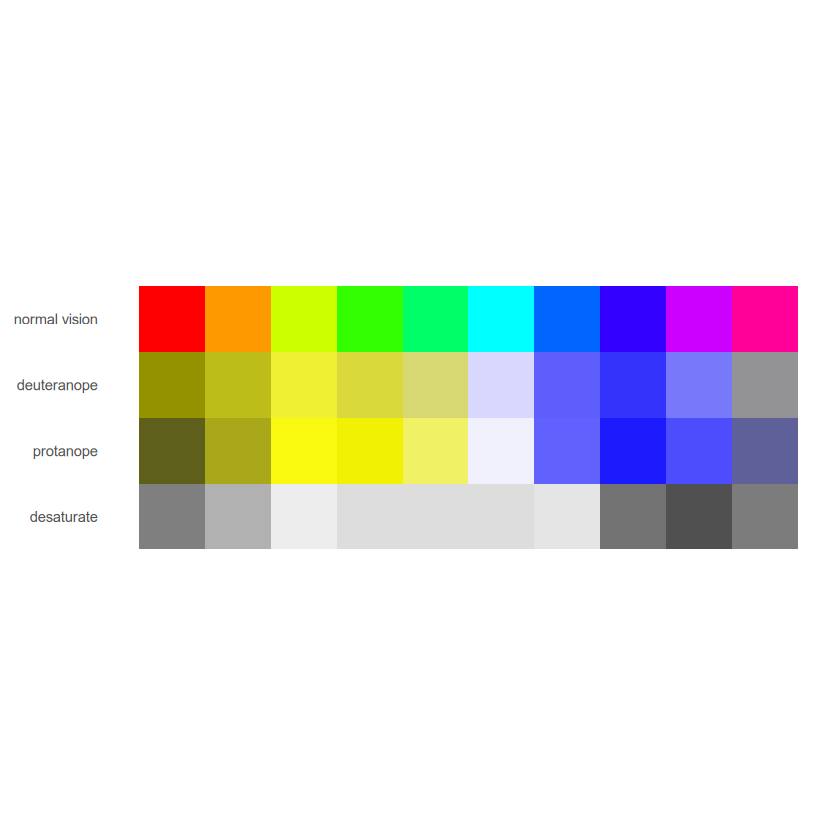

In [4]:
colorBlindness::displayAllColors(rainbow(10))

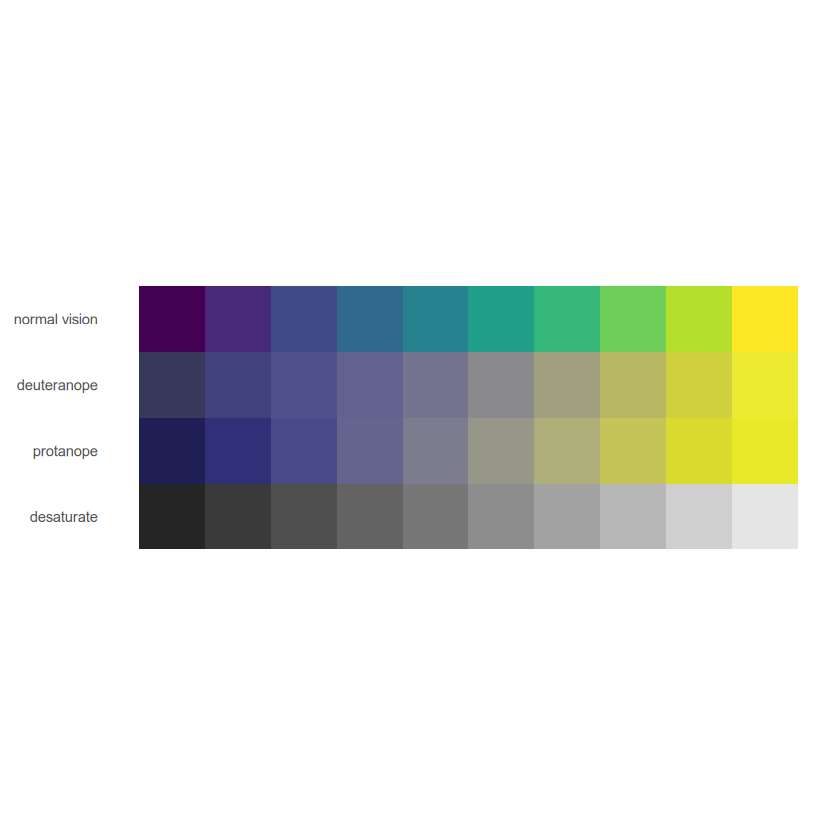

In [5]:
colorBlindness::displayAllColors(viridis::viridis(10))

### Escalas de color Viridis

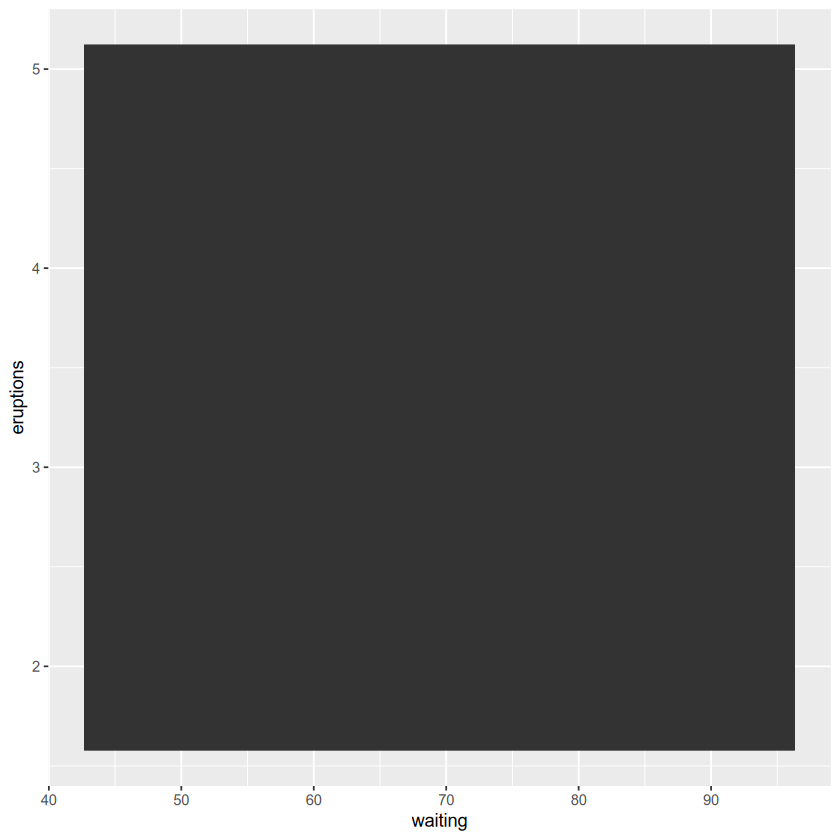

In [6]:
ggplot(faithfuld, aes(waiting, eruptions)) +
  geom_raster()

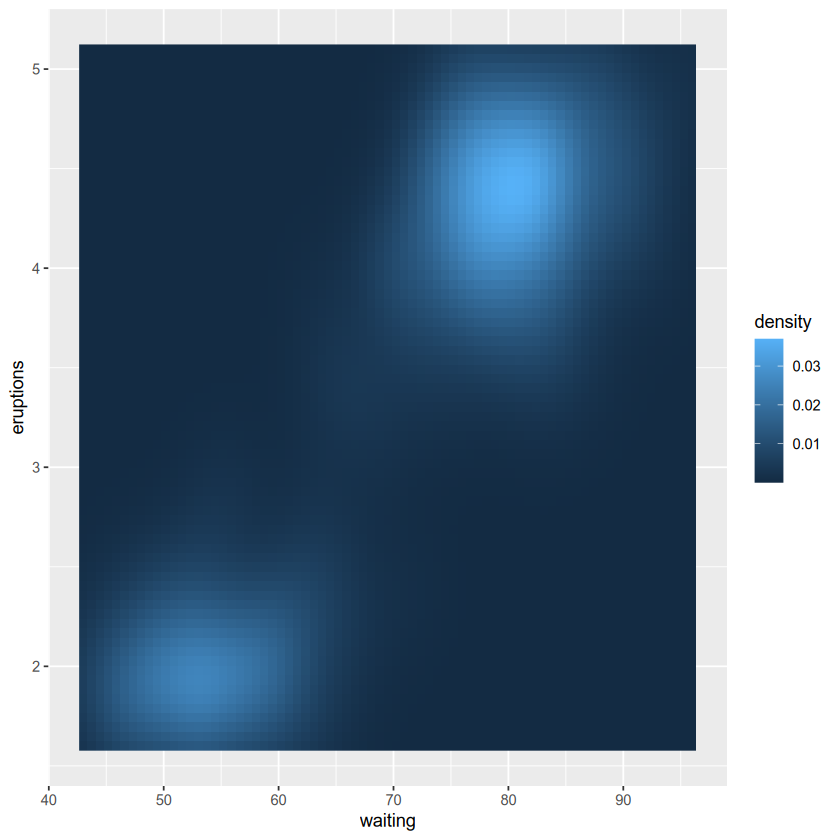

In [7]:
ggplot(
    faithfuld,
    aes(
        waiting,
        eruptions, 
        fill = density # coloracion continua (default)
    )
  ) +
  geom_raster()

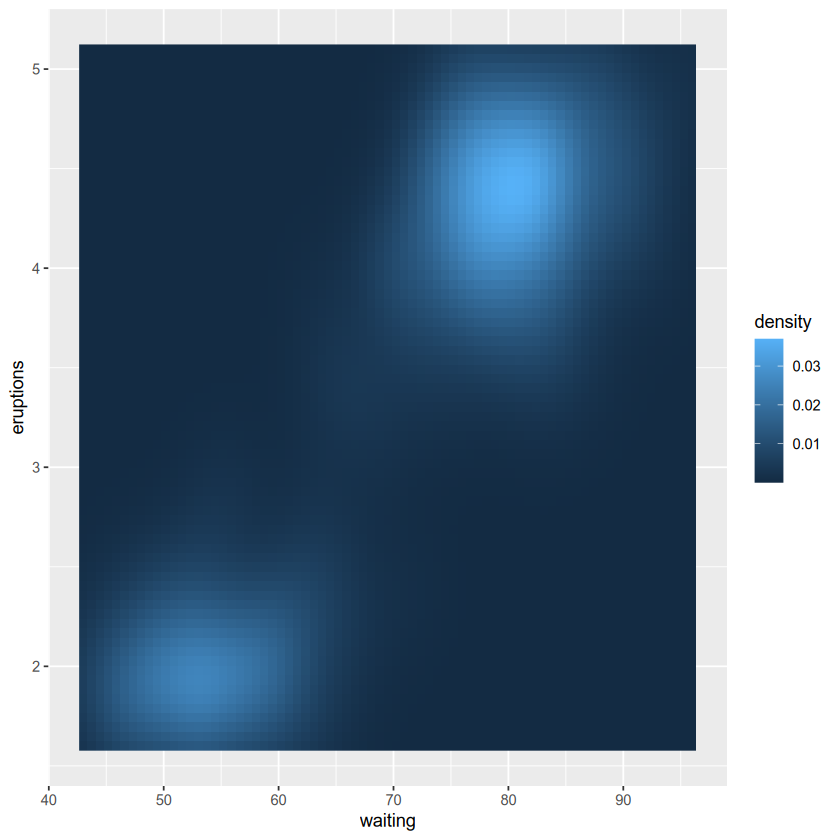

In [8]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_continuous() # R infiere aplicar esta escala de color

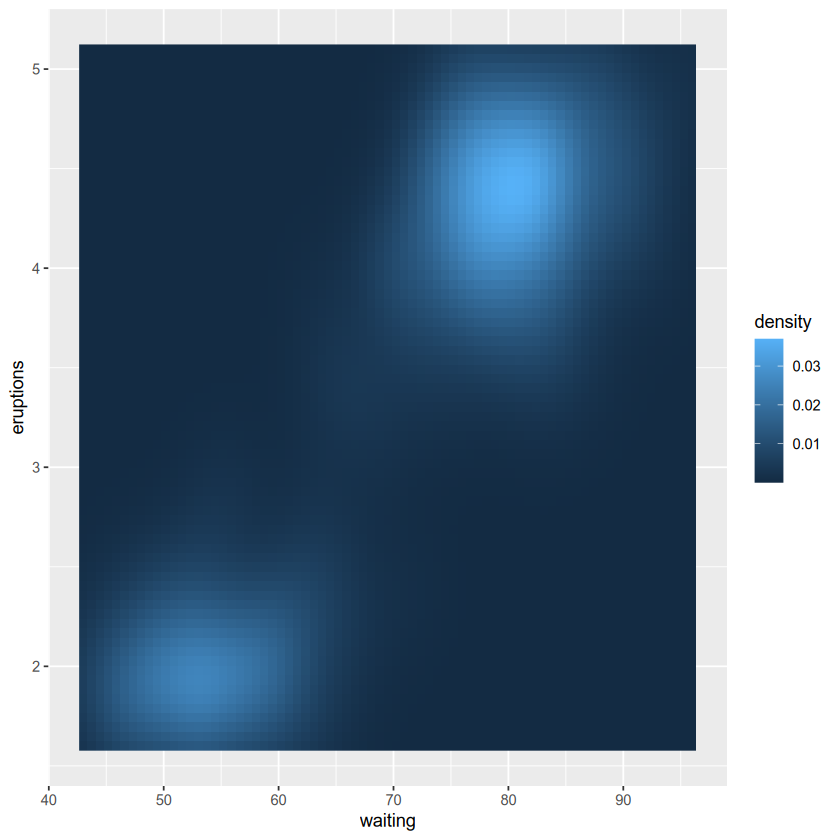

In [9]:
ggplot(faithfuld, aes(waiting, eruptions,  fill = density)) +
  geom_raster() +
  scale_fill_gradient() # Degradado de 2 colores

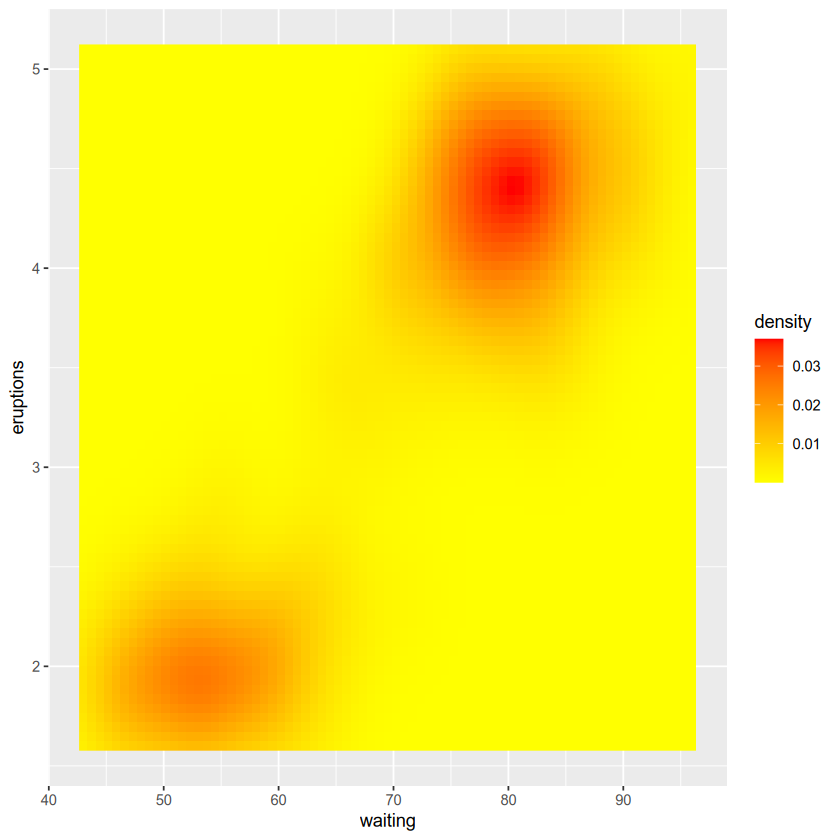

In [10]:
ggplot(faithfuld, aes(waiting, eruptions,  fill = density)) +
  geom_raster() +
  scale_fill_gradient(low = 'yellow', high = 'red')

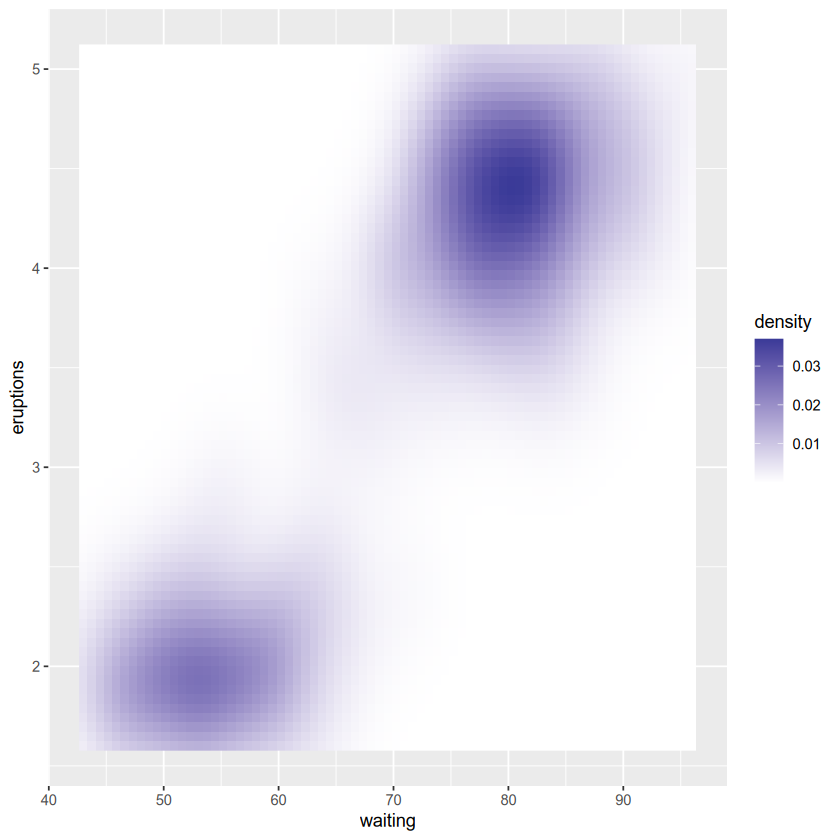

In [11]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_gradient2() # Degradado de 3 colores

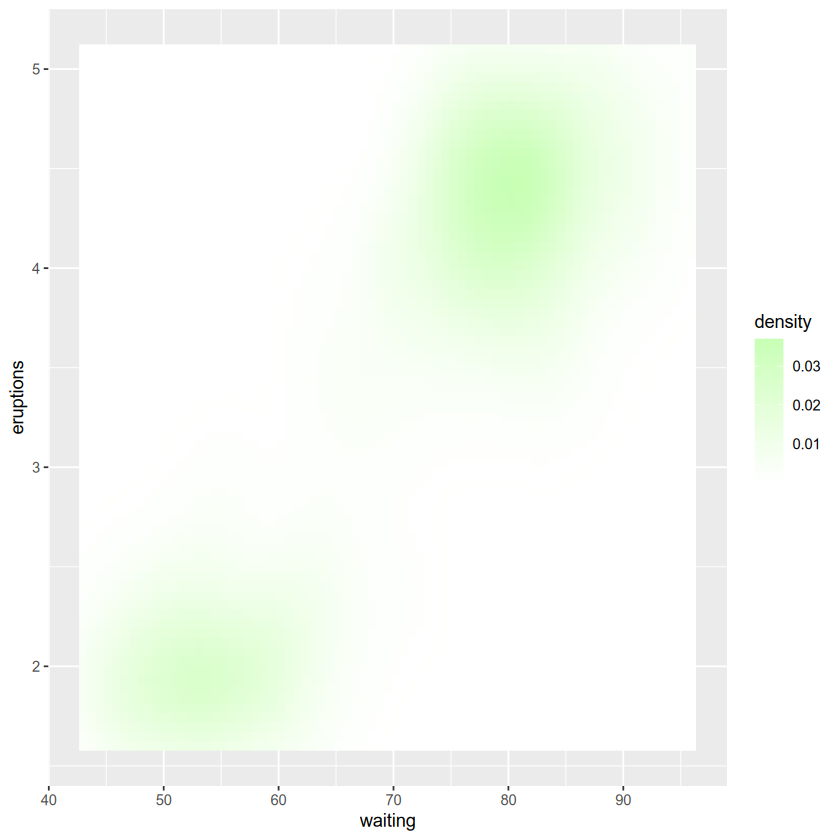

In [12]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_gradient2(
      low = 'white', mid = 'green', high = 'black',
      midpoint = 0.1 # default(0)
  )

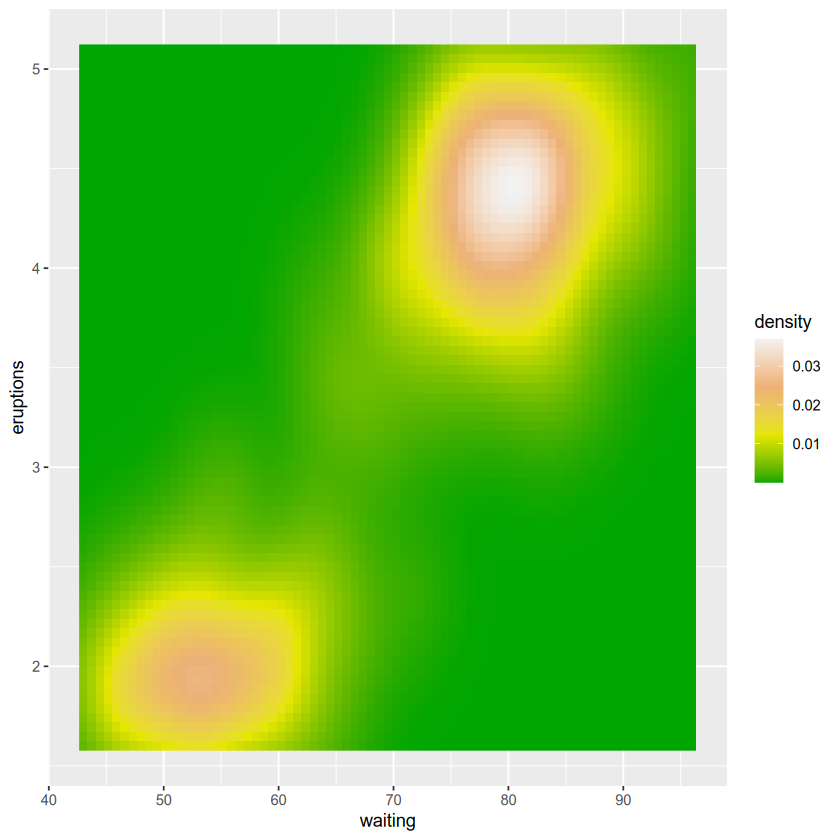

In [13]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_gradientn(colors = terrain.colors(4)) # Degradado de n colores

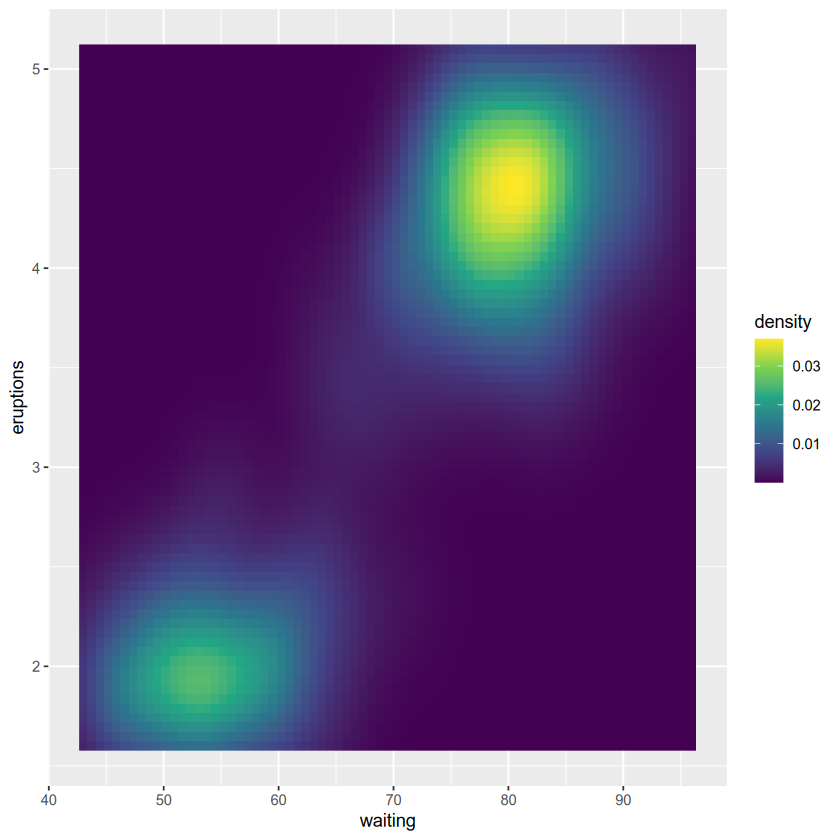

In [14]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_viridis_c() # Cambiar por coloracion _c de continua, existe _d (discreta)

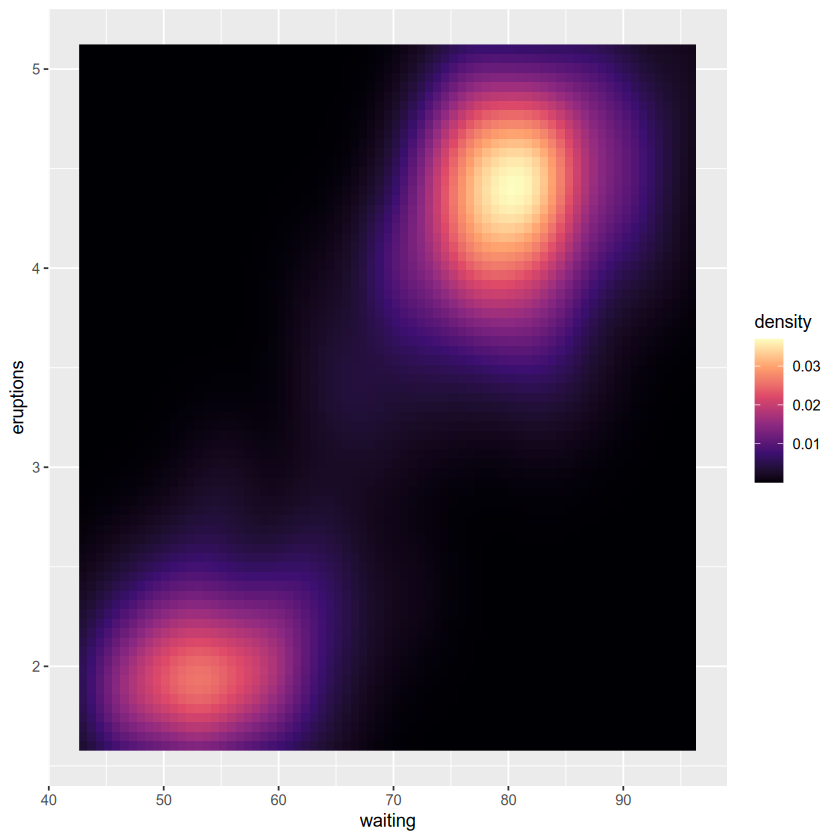

In [15]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_viridis_c(option = "A") # Opciones desde la a la H

### Escalas de color ColorBrewer

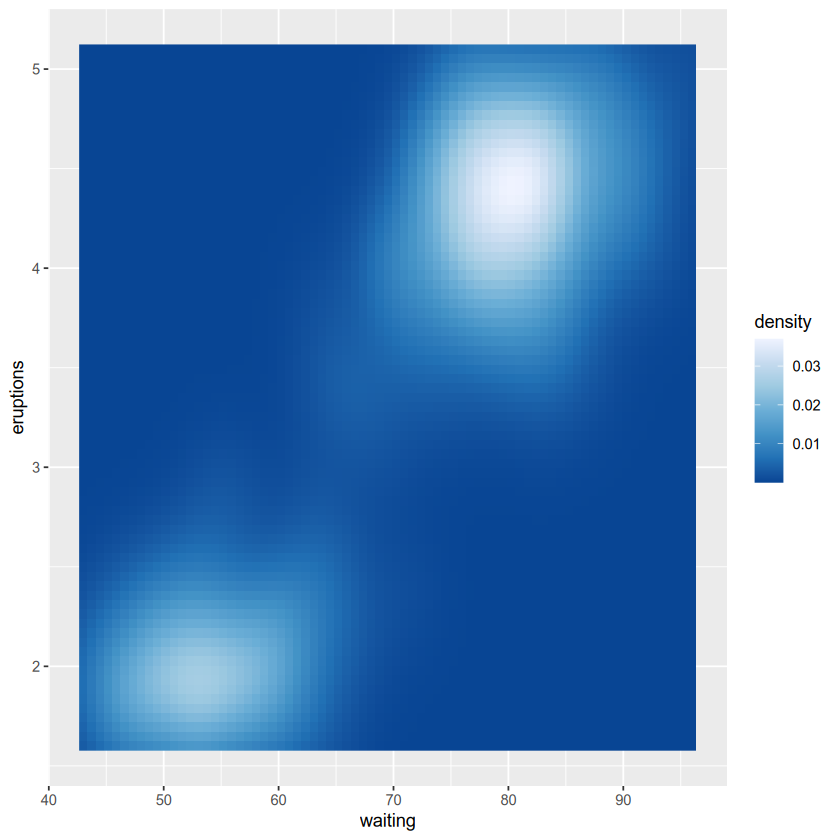

In [16]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_distiller()

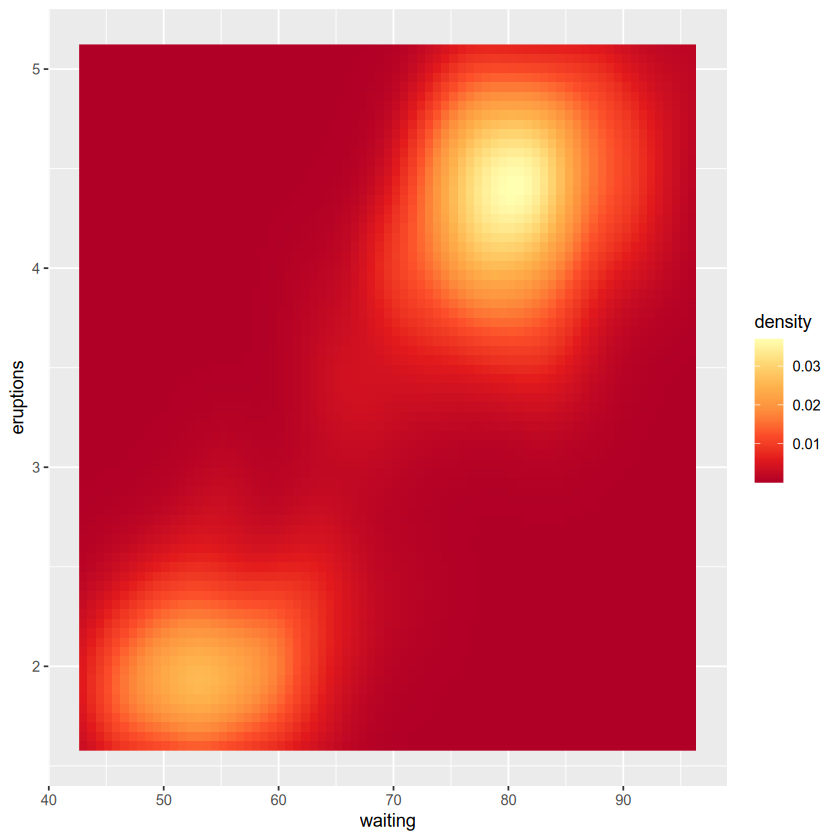

In [17]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_distiller(palette = 'YlOrRd')

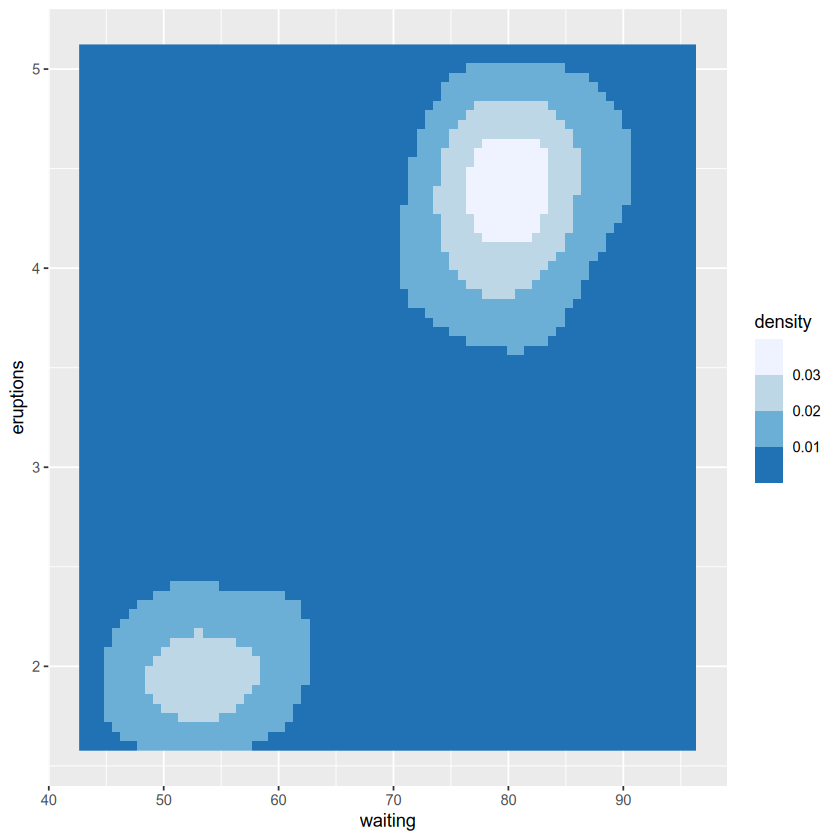

In [18]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_fermenter() # Escalas agrupadas

In [19]:
# scale_fill_brewer() # Para escalas discretas

### Escalas de color Scico

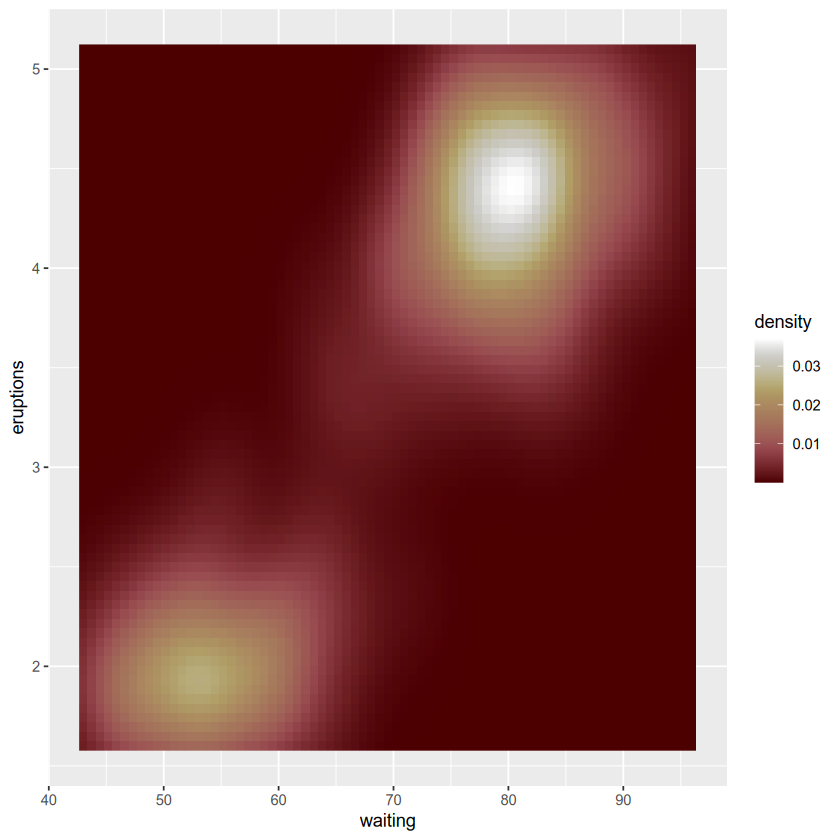

In [20]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scico::scale_fill_scico()

### Escalas de color Paletteer

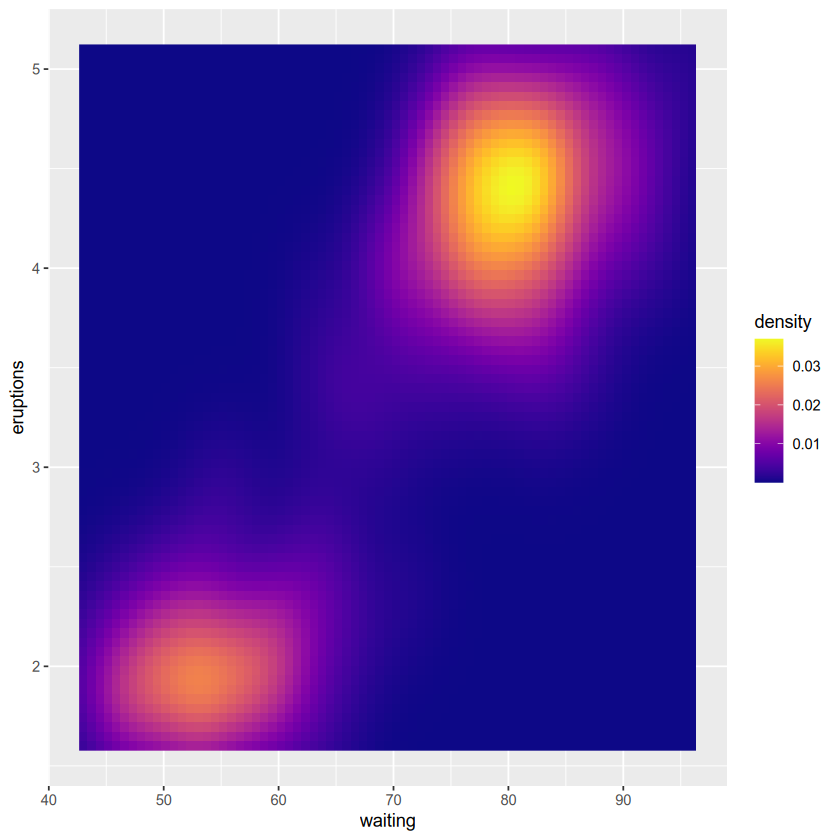

In [21]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  paletteer::scale_fill_paletteer_c('viridis::plasma')

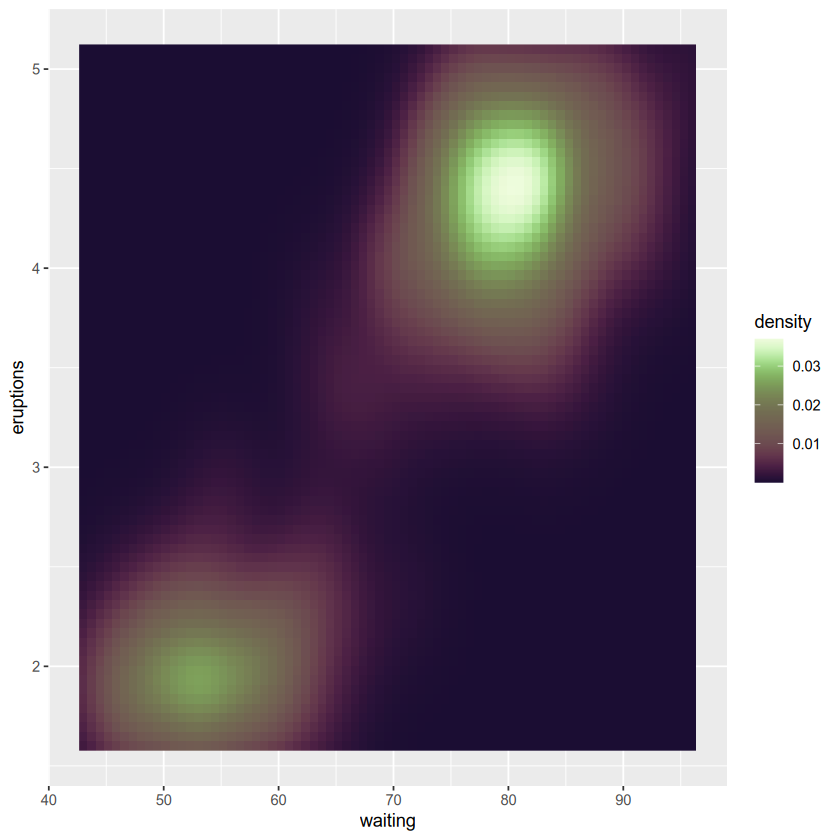

In [22]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  paletteer::scale_fill_paletteer_c('scico::tokyo')

### Escalas de color Munsell

Warning message:
“Removed 28 rows containing missing values or values outside the scale range (`geom_text()`).”


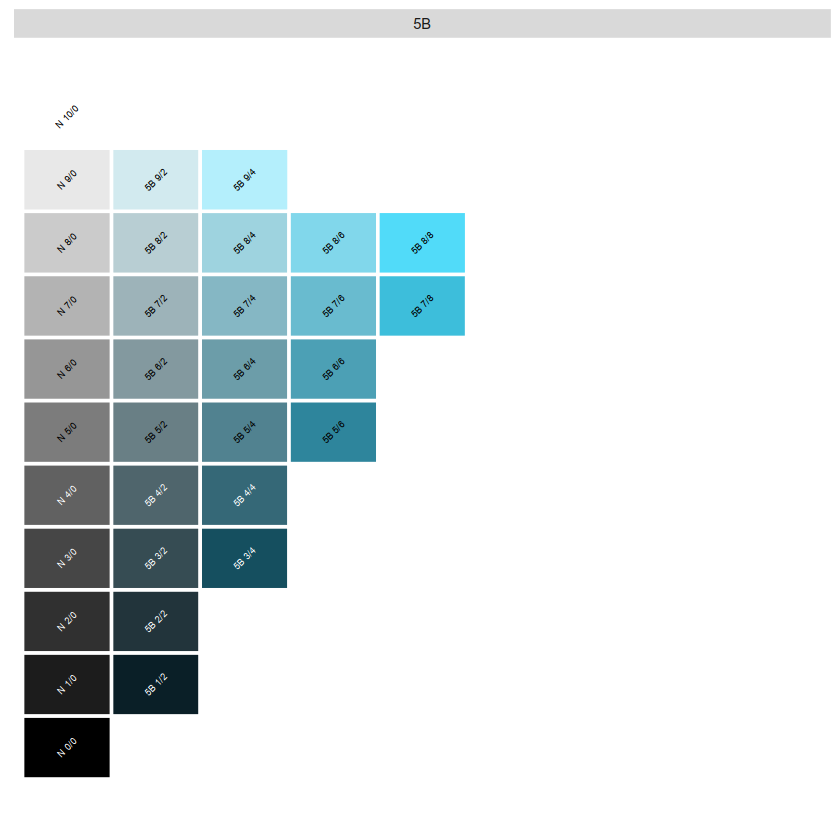

In [23]:
hue_slice('5B')

Warning message:
“Removed 19 rows containing missing values or values outside the scale range (`geom_text()`).”


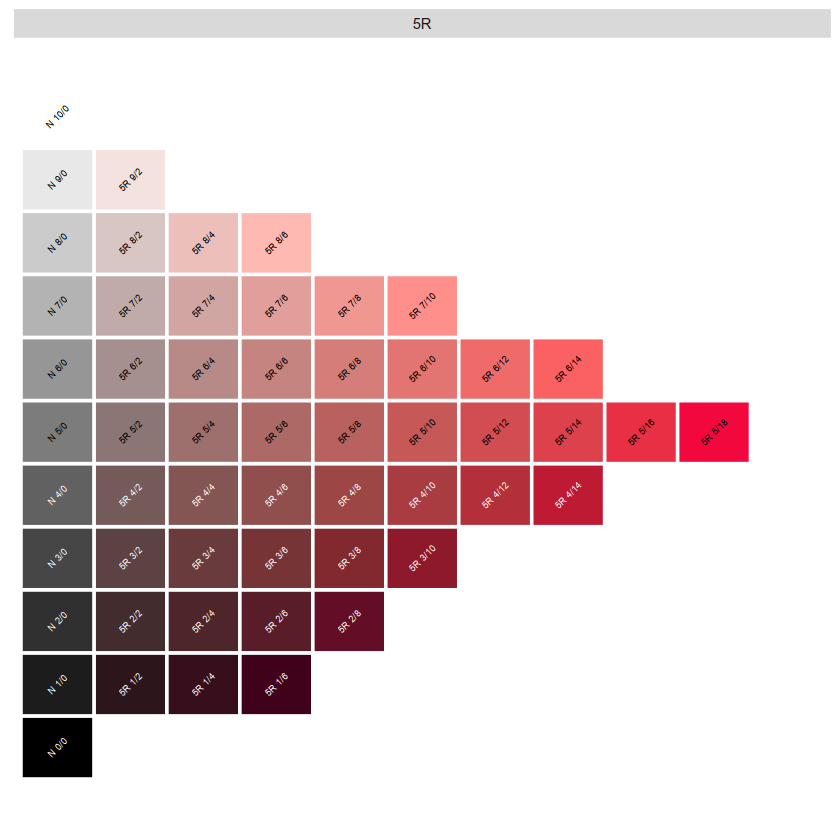

In [24]:
hue_slice('5R')

Warning message:
“Removed 21 rows containing missing values or values outside the scale range (`geom_text()`).”


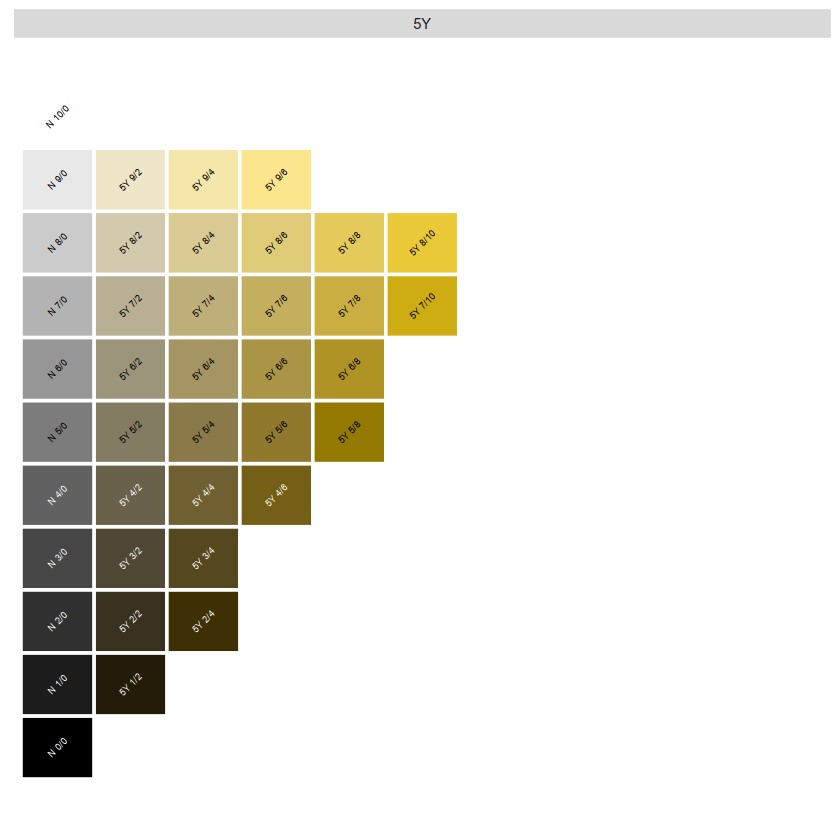

In [25]:
hue_slice('5Y')

Warning message in in_gamut(col, ...):
“some specified colours are undefined. You could try fix = TRUE”
Warning message in in_gamut(col, ...):
“some specified colours are undefined. You could try fix = TRUE”


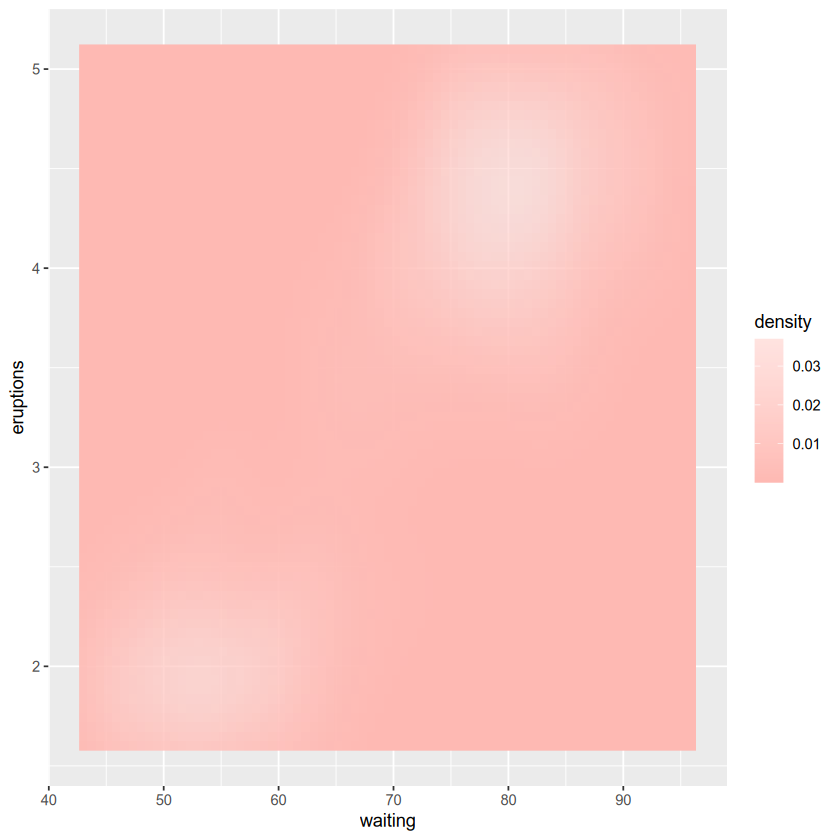

In [26]:
ggplot(faithfuld, aes(waiting, eruptions, fill = density)) +
  geom_raster() +
  scale_fill_gradient2(
      low = munsell::mnsl('5R 8/6'),
      mid = munsell::mnsl('5B 4/6'),
      high = munsell::mnsl('5B 1/6'),
      midpoint = 0.1 # default(0)
  )

### Personalizar la leyenda de la escala de color continua

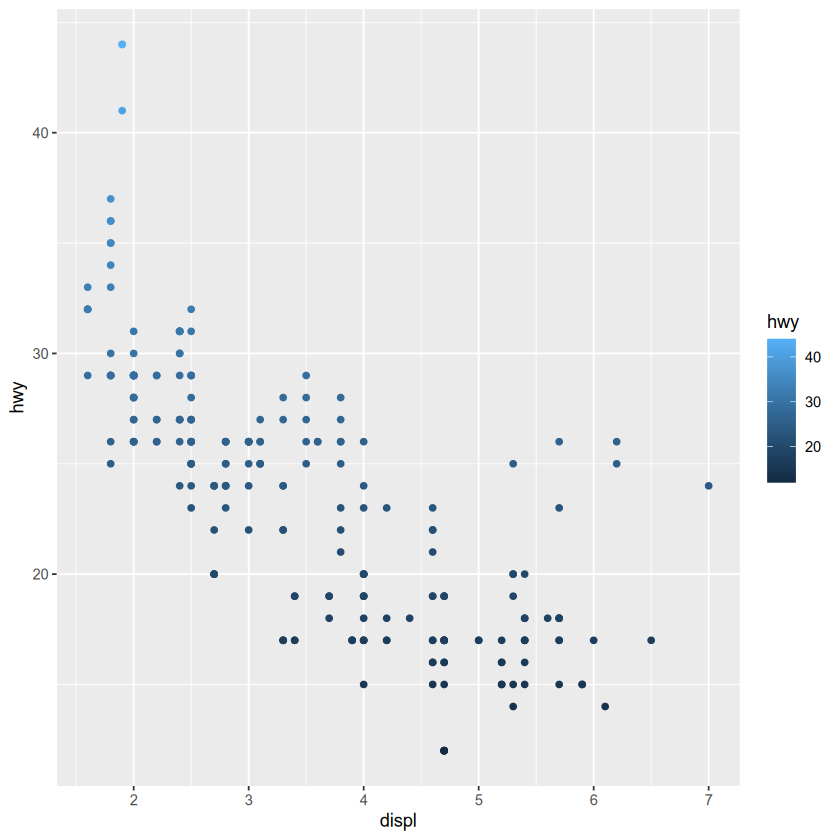

In [27]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point()

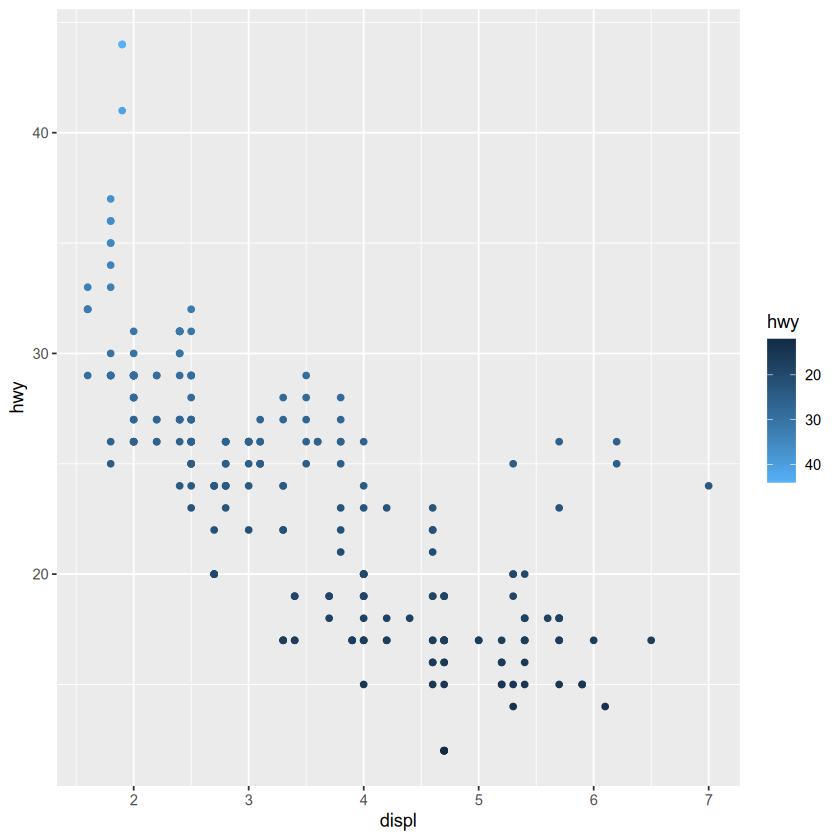

In [28]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point() +
  guides(color = guide_colorbar(reverse = TRUE)) # Invierte el máximo y minimo

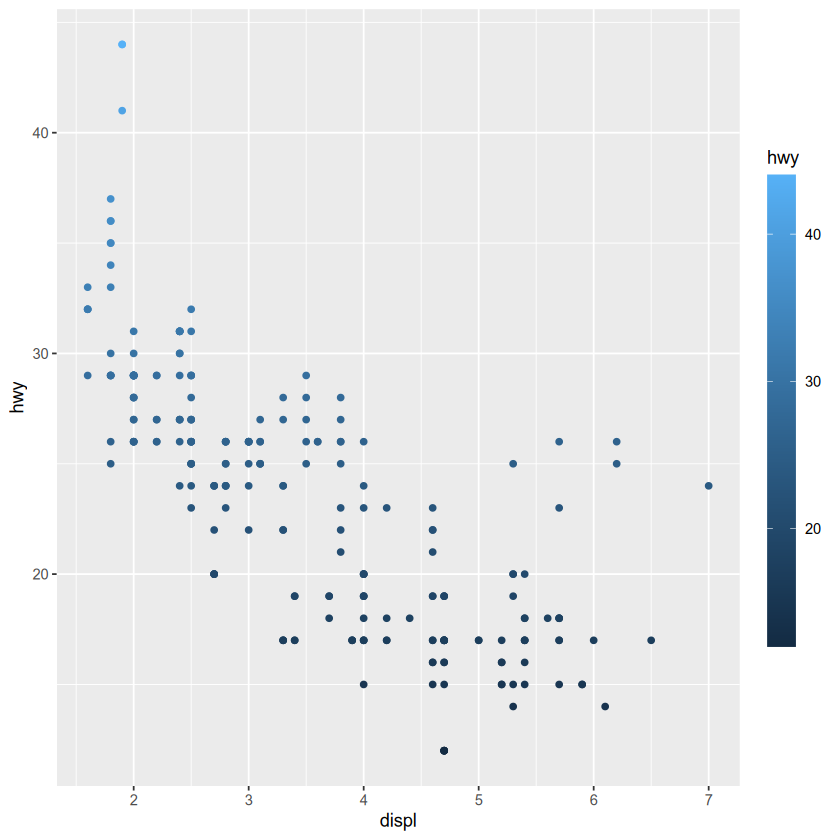

In [29]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point() +
  guides(color = guide_colorbar(barheight = unit(10, "cm"))) #Modificar la altura de la barra

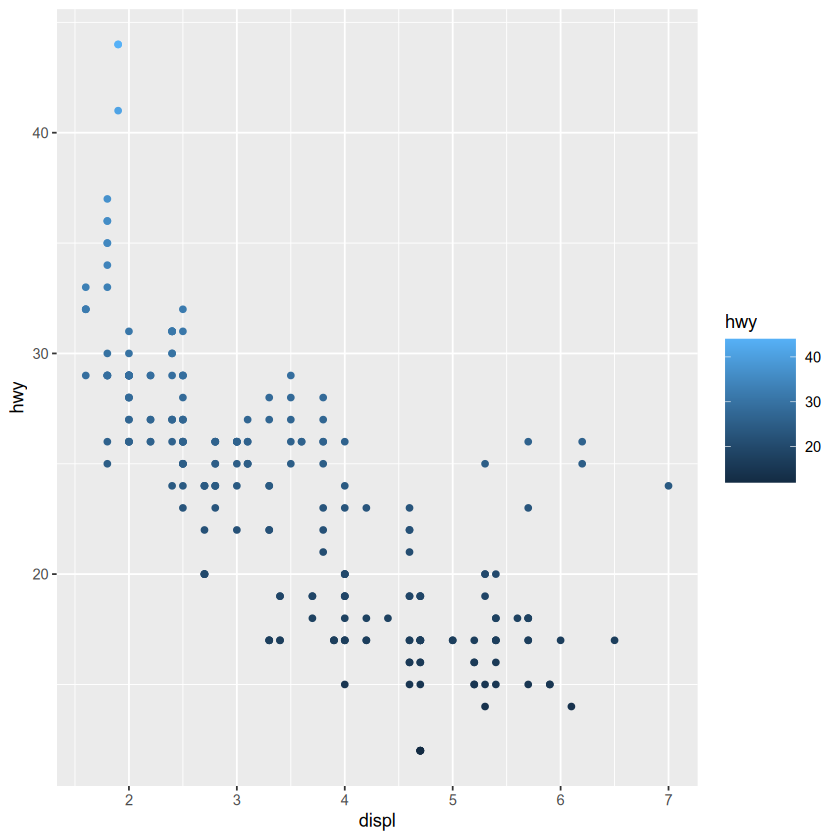

In [30]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point() +
  guides(color = guide_colorbar(barwidth = unit(1.5, "cm"))) #Modificar la anchura de la barra

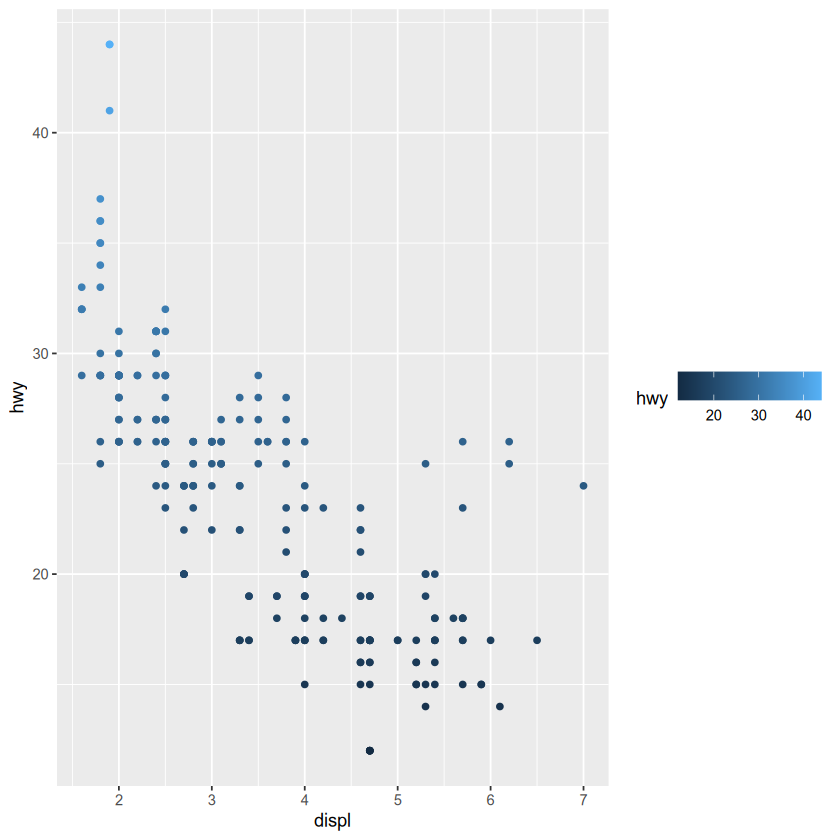

In [31]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point() +
  guides(color = guide_colorbar(direction = "horizontal")) # Cambiar la horientación de la barra

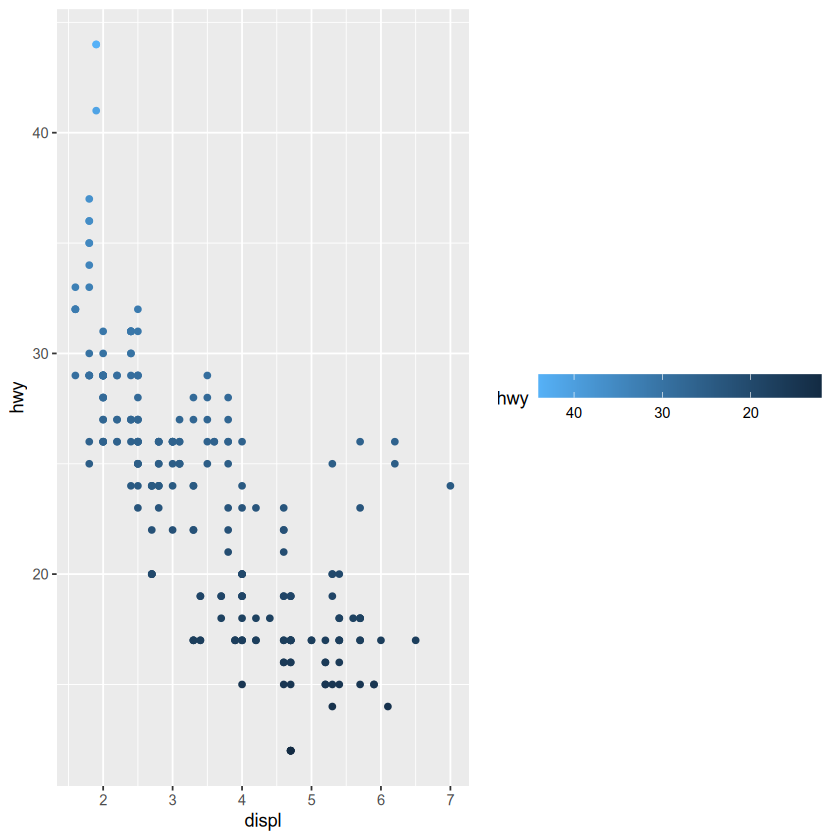

In [32]:
ggplot(mpg, aes(displ, hwy, color = hwy)) +
  geom_point() +
  guides(
      color = guide_colorbar(
          direction = "horizontal",
          barwidth = unit(6, "cm"),
          barheight = unit(0.5, "cm"),
          reverse = TRUE
      )
  ) 

### Personalizar la leyenda de la escala de color discreta

In [33]:
datos <- data.frame(
    x = c("a", "b", "c", "d"),
    y = c(3, 4, 1, 2)
)

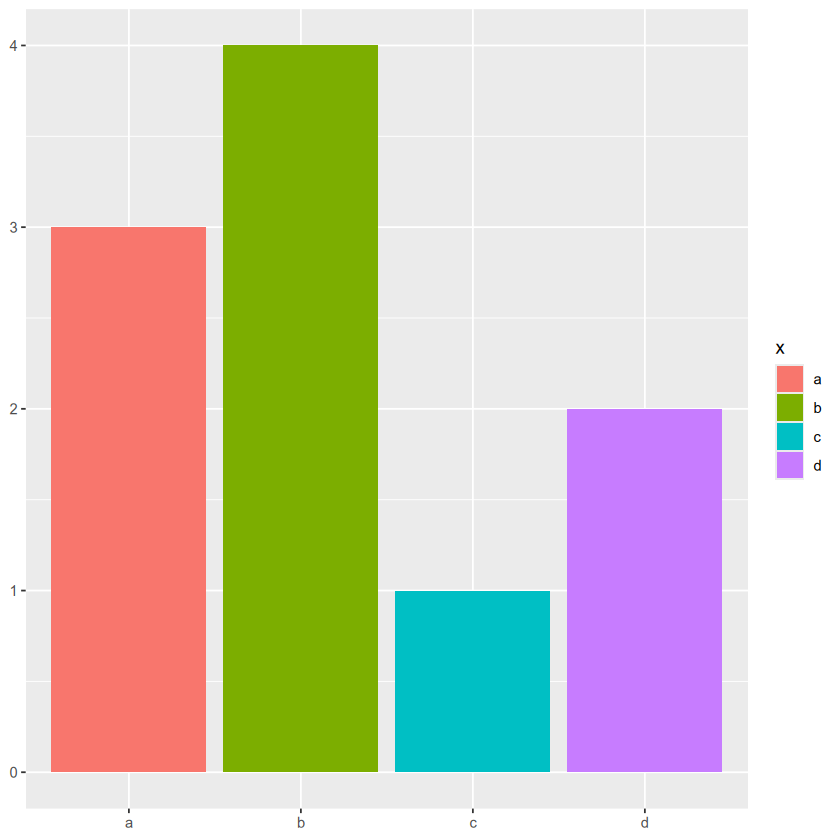

In [34]:
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL)

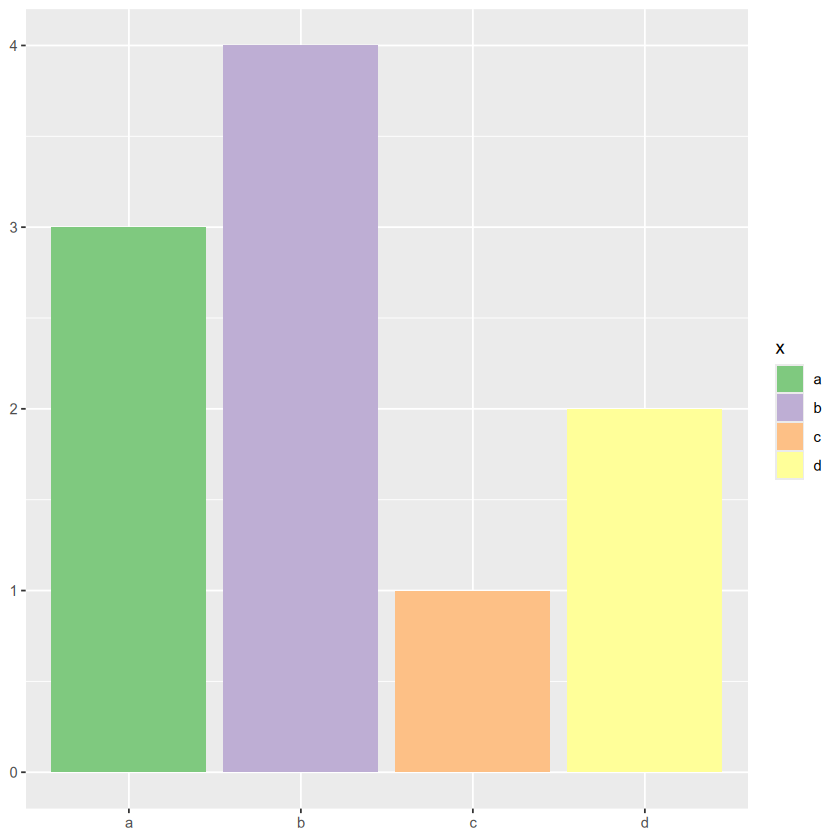

In [35]:
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL) +
  scale_fill_brewer(palette = "Accent") # Personalizar los colores

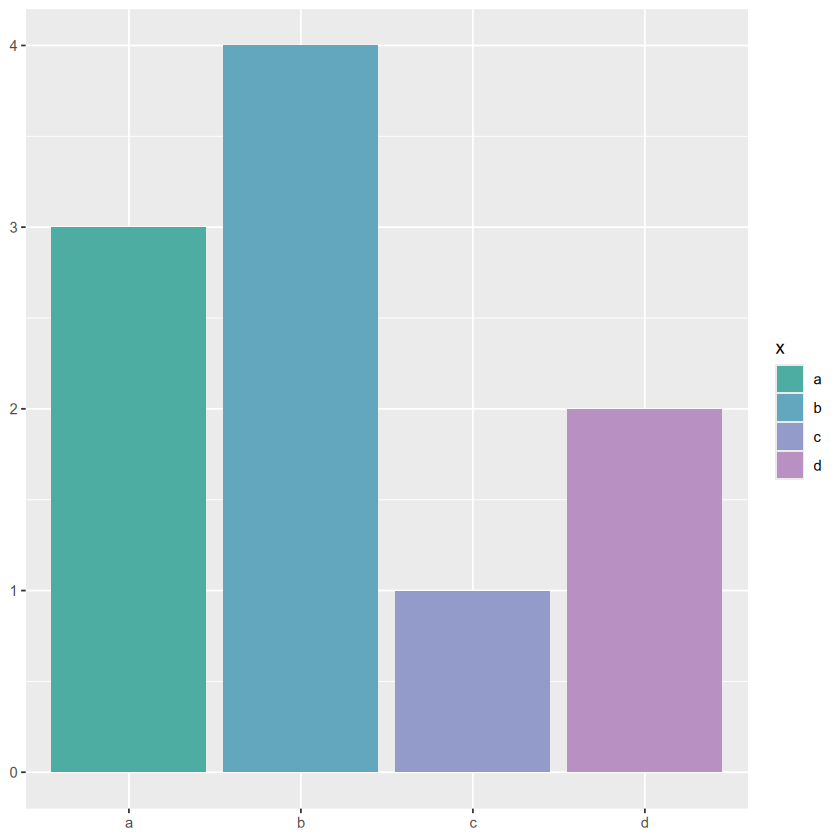

In [36]:
# Usando codificacion HCL
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL) +
  scale_fill_hue(
      c = 40, # Croma
      h = c(180, 300) # Tono
  )

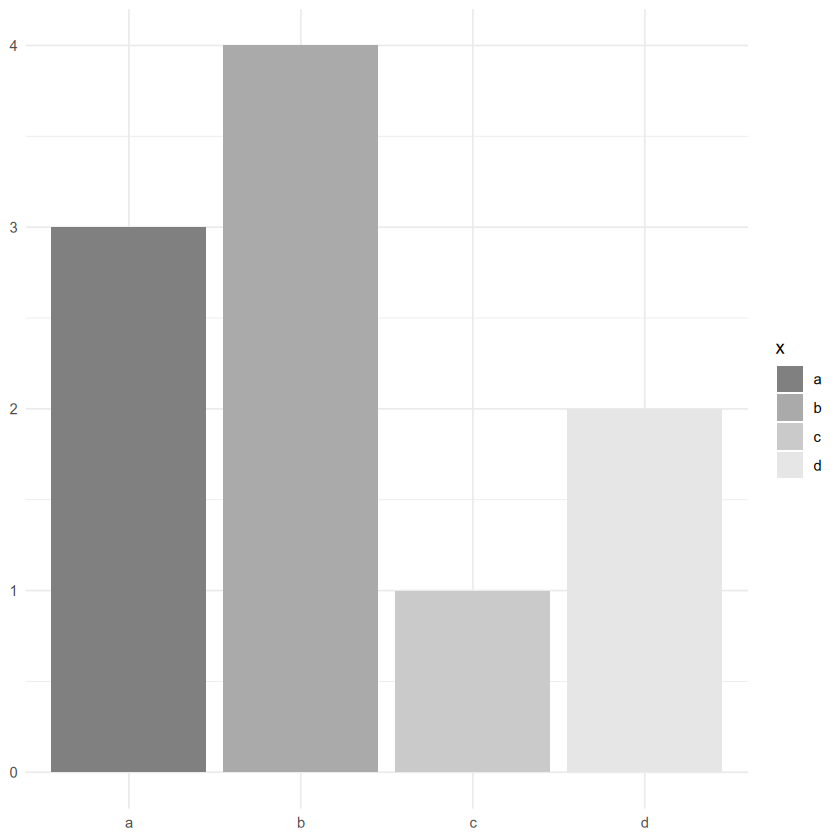

In [37]:
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL) +
  scale_fill_grey(start = 0.5, end = 0.9) + # Escala de grises (0 -> negro, 1 -> blanco)
  theme_minimal()

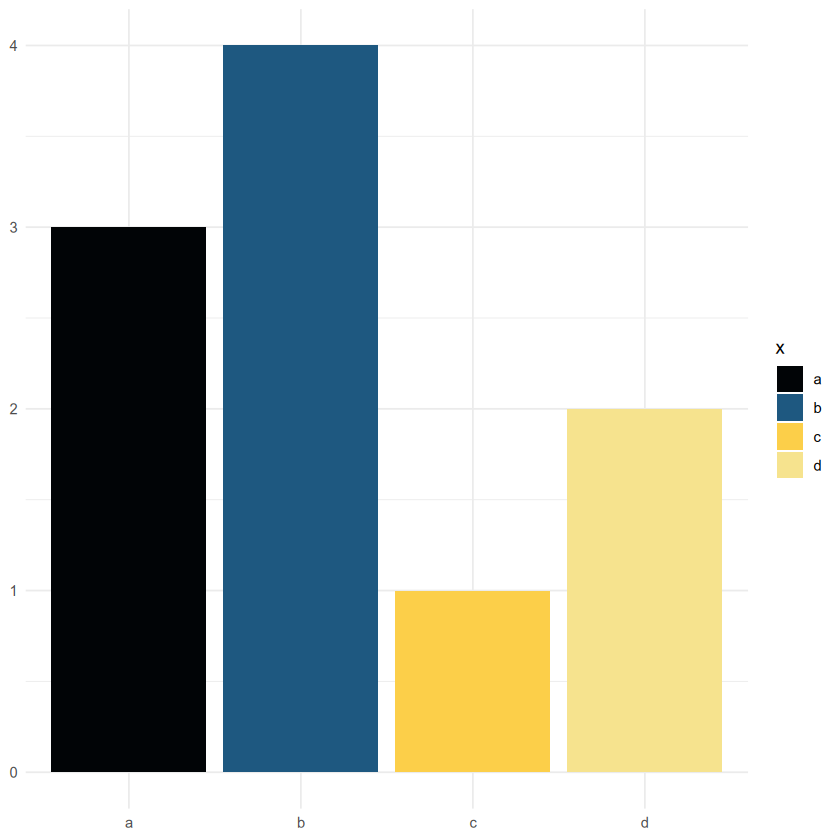

In [38]:
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL) +
  paletteer::scale_fill_paletteer_d("rtist::vangogh") +
  theme_minimal()

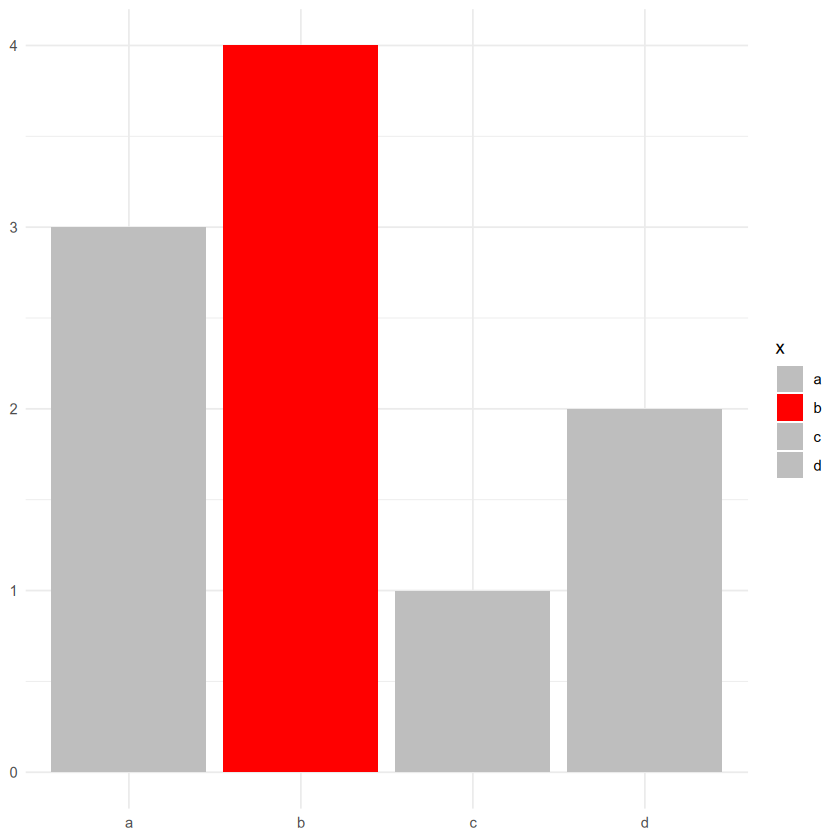

In [39]:
# Paleta manual
# Resaltar alguna categoria
ggplot(datos, aes(x, y, fill = x)) +
  geom_bar(stat = "identity") +
  labs(x = NULL, y = NULL) +
  scale_fill_manual(
      values = c("grey", "red", "grey", "grey")
  ) +
  theme_minimal()

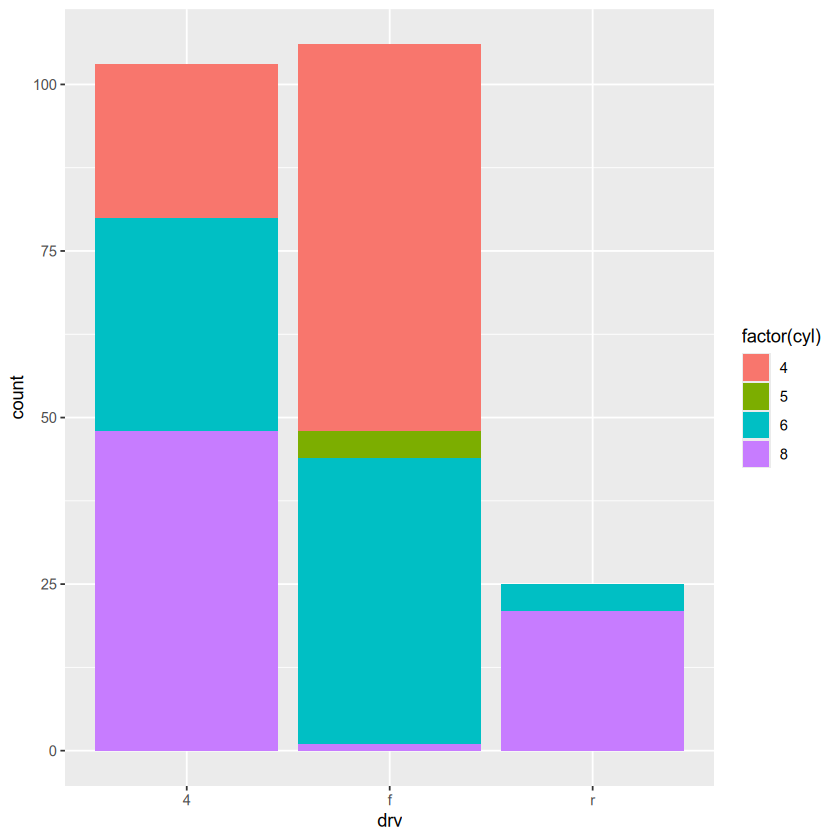

In [42]:
ggplot(mpg, aes(drv, fill = factor(cyl))) +
  geom_bar()

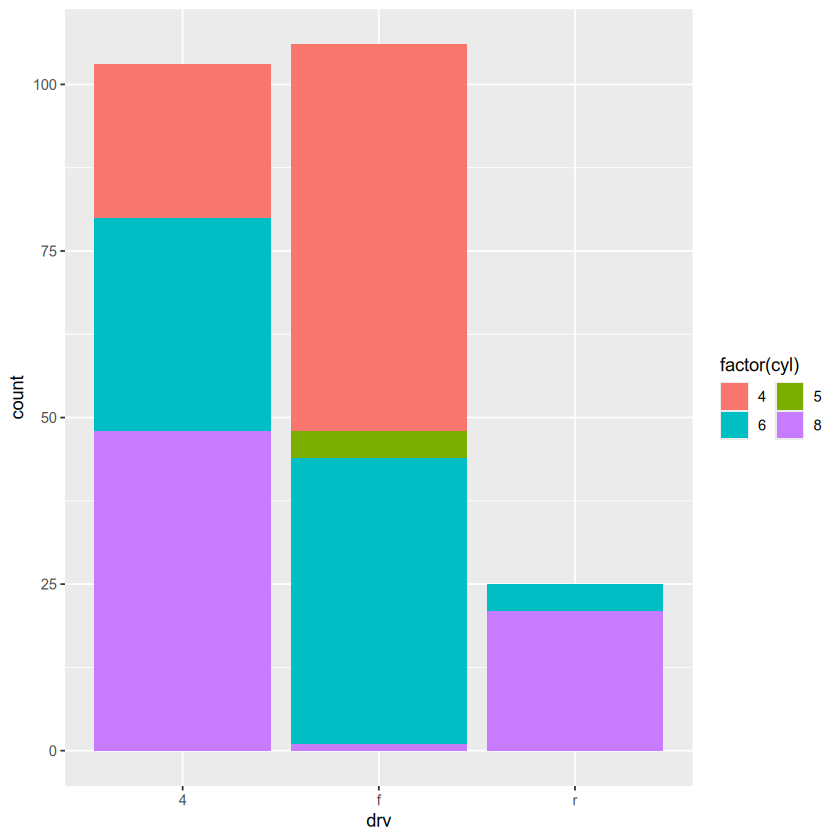

In [43]:
ggplot(mpg, aes(drv, fill = factor(cyl))) +
  geom_bar() +
  guides(
      fill = guide_legend(ncol = 2, byrow = TRUE) # Personalizar numero de legends
  )

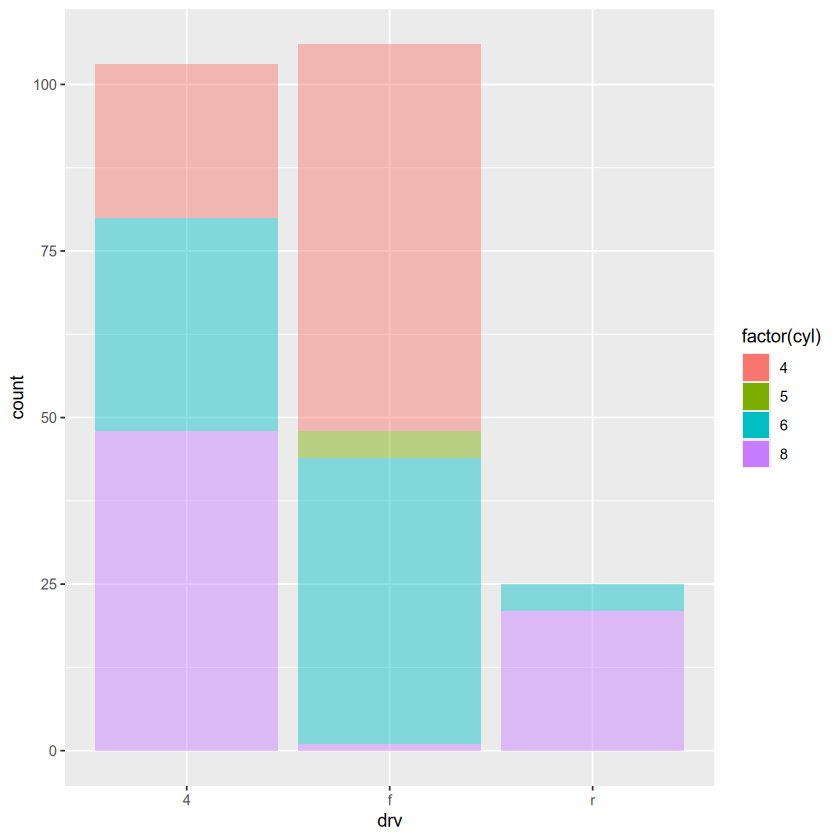

In [44]:
ggplot(mpg, aes(drv, fill = factor(cyl))) +
  geom_bar(alpha = 0.45) +
  guides(
      fill = guide_legend(
          override.aes = list(alpha = 1) # Mantener el alpha de los legends con un valor distinto
      )
  )

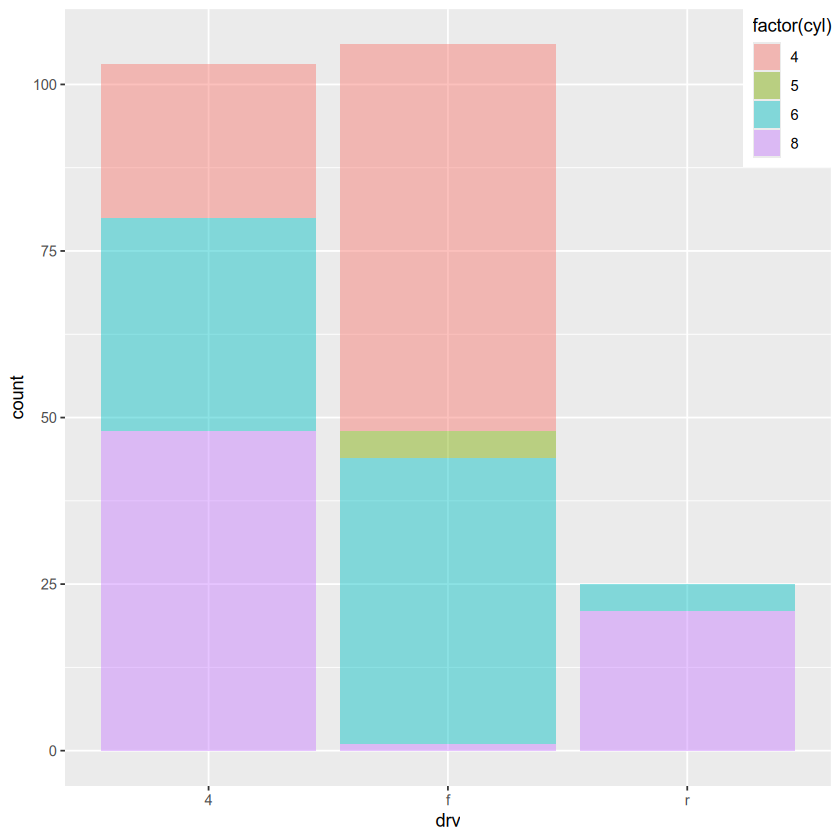

In [ ]:
ggplot(mpg, aes(drv, fill = factor(cyl))) +
  geom_bar(alpha = 0.45) +
  theme(
      legend.position = c(0.95, 0.9), # "Coordenadas" dentro de la gráfica
  )